In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import logging
import gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")
%matplotlib inline 

In [3]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [4]:
# Parameters
gymid = "CyberBattleTiny-v0"
iteration_count = 200
training_episode_count = 10
eval_episode_count = 10
maximum_node_count = 5
maximum_total_credentials = 3


In [5]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'dict'>`
  logger.warn(
Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:146: UserWarning: WARN: The obs returned by the `step()` method was expecting a numpy array, actual type: <class 'tuple'>
  logger.warn(f"{pre} was expecting a numpy array, actual type: {type(obs)}")
/home/wblum/miniconda3/envs/cybersim/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:133: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'numpy.int32'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:   22.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 47|reward:   31.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 47|reward:   31.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 1|Iteration 137|reward:   31.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:   31.0|last_reward_at:   47|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/97 (0.01)
    explore-remote: 2/84 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/16 (0.00)
  exploit deflected to exploration: 2
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 117|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/84 (0.01)
    explore-remote: 2/73 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/40 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8687, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 119|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/98 (0.01)
    explore-remote: 2/78 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/21 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8535, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/82 (0.01)
    explore-remote: 2/79 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/36 (0.00)
  exploit deflected to exploration: 2
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8386, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 178|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/75 (0.01)
    explore-remote: 2/84 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/38 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8239, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 117|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 200|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/80 (0.01)
    explore-remote: 2/86 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/31 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8096, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/72 (0.01)
    explore-remote: 2/90 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/35 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.7956, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 122|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/74 (0.01)
    explore-remote: 2/85 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/38 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.7818, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 20|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 130|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/87 (0.01)
    explore-remote: 2/69 (0.03)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/41 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.7683, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 119|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 200|reward:   31.0|last_reward_at:   29|Elapsed Time: 0:00:00||

  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/77 (0.01)
    explore-remote: 2/79 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/41 (0.00)
  exploit deflected to exploration: 3
simulation ended


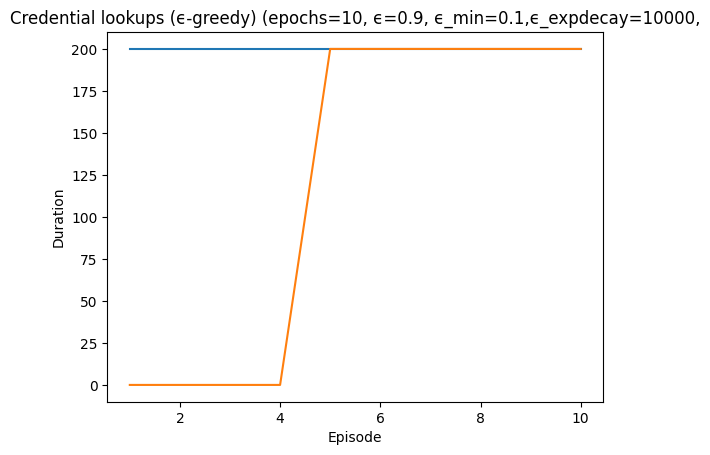

In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=10,iteration_count=200,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/10 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   31.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward: 1031.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward: 1031.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 112|reward: 1031.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward: 1031.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward: 1031.0|last_reward_at:   64|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/45 (0.02)
    explore-remote: 2/81 (0.02)
    explore-connect: 1/65 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 0/4 (0.00)
  exploit deflected to exploration: 18
  ## Episode: 2/10 'Tabular Q-learning' ϵ=0.8653, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward: 1031.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 125|reward: 1031.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 173|reward: 1031.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward: 1031.0|last_reward_at:  125|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/48 (0.00)
    explore-remote: 1/59 (0.02)
    explore-connect: 1/68 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/21 (0.00)
  exploit deflected to exploration: 14
  ## Episode: 3/10 'Tabular Q-learning' ϵ=0.8317, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward: 1031.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward: 1031.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward: 1031.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 147|reward: 1031.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 193|reward: 1031.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward: 1031.0|last_reward_at:   53|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 1/79 (0.01)
    explore-connect: 1/68 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/6 (0.00)
  exploit deflected to exploration: 21
  ## Episode: 4/10 'Tabular Q-learning' ϵ=0.7995, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1031.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 69|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 155|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 198|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/50 (0.02)
    explore-remote: 2/75 (0.03)
    explore-connect: 1/71 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 40
  ## Episode: 5/10 'Tabular Q-learning' ϵ=0.7686, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward: 1031.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 5|Iteration 84|reward: 1031.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 130|reward: 1031.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 178|reward: 1031.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward: 1031.0|last_reward_at:   84|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/44 (0.02)
    explore-remote: 1/71 (0.01)
    explore-connect: 1/58 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 0/22 (0.00)
  exploit deflected to exploration: 37
  ## Episode: 6/10 'Tabular Q-learning' ϵ=0.7388, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward: 1031.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 107|reward: 1031.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 155|reward: 1031.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 198|reward: 1031.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 200|reward: 1031.0|last_reward_at:   59|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/39 (0.00)
    explore-remote: 1/76 (0.01)
    explore-connect: 1/69 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 0/11 (0.00)
  exploit deflected to exploration: 37
  ## Episode: 7/10 'Tabular Q-learning' ϵ=0.7102, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 74|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 130|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 134|reward: 1031.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 7|Iteration 134|reward: 1031.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 7|Iteration 180|reward: 1031.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward: 1031.0|last_reward_at:  134|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/46 (0.02)
    explore-remote: 2/69 (0.03)
    explore-connect: 1/52 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/29 (0.00)
  exploit deflected to exploration: 28
  ## Episode: 8/10 'Tabular Q-learning' ϵ=0.6828, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 34|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 117|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 152|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 188|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward: 1031.0|last_reward_at:   34|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/45 (0.00)
    explore-remote: 1/80 (0.01)
    explore-connect: 1/65 (0.02)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/6 (0.00)
  exploit deflected to exploration: 55
  ## Episode: 9/10 'Tabular Q-learning' ϵ=0.6564, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 12|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 87|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 125|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 157|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/46 (0.00)
    explore-remote: 1/71 (0.01)
    explore-connect: 1/77 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 0/1 (0.00)
  exploit deflected to exploration: 62
  ## Episode: 10/10 'Tabular Q-learning' ϵ=0.6311, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward: 1031.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward: 1031.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 87|reward: 1031.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 127|reward: 1031.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 168|reward: 1031.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 200|reward: 1031.0|last_reward_at:   48|Elapsed Time: 0:00:00||

  Episode 10 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/44 (0.02)
    explore-remote: 1/79 (0.01)
    explore-connect: 1/60 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/13 (0.00)
  exploit deflected to exploration: 76
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 64|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 173|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/190 (0.00)
  exploit deflected to exploration: 8
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 66|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 122|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/3 (0.25)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/190 (0.00)
  exploit deflected to exploration: 8
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 117|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 173|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/194 (0.00)
  exploit deflected to exploration: 4
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 66|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 119|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 173|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/2 (0.33)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/191 (0.00)
  exploit deflected to exploration: 7
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 61|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 117|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 173|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/0 (1.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/193 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 69|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 173|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 200|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/187 (0.00)
  exploit deflected to exploration: 11
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 132|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 188|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 1/10 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/179 (0.00)
  exploit deflected to exploration: 19
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 69|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 125|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 183|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/189 (0.00)
  exploit deflected to exploration: 9
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 69|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 119|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 168|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 1/4 (0.20)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/186 (0.00)
  exploit deflected to exploration: 12
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 132|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 188|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 200|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

  Episode 10 stopped at t=200 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 1/9 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 0/179 (0.00)
  exploit deflected to exploration: 19
simulation ended


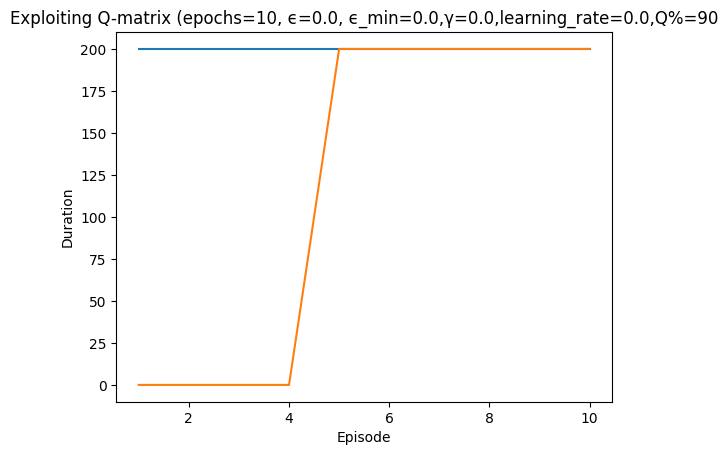

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

In [10]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=10,iteration_count=200,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

/home/wblum/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:382: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 20|reward:   31.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 71|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 160|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/56 (0.02)
    explore-remote: 2/77 (0.03)
    explore-connect: 1/62 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 25
  ## Episode: 2/10 'DQL' ϵ=0.8688, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:   31.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward: 1031.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward: 1031.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward: 1031.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 116|reward: 1031.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 160|reward: 1031.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward: 1031.0|last_reward_at:   32|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 2/76 (0.03)
    explore-connect: 0/73 (0.00)
    exploit-local: 0/4 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 32
  ## Episode: 3/10 'DQL' ϵ=0.8386, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward: 1031.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 16|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 23|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 26|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 28|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 30|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 36|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 40|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 44|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 46|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 49|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 51|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 54|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 56|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 59|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 61|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 64|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 66|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 3|Iteration 69|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 71|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 74|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 76|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 79|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 82|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 84|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 86|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 88|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 91|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 94|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 3|Iteration 97|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 99|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 102|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 104|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 107|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 109|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 112|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 114|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 117|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 119|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 122|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 125|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 127|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 3|Iteration 130|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 132|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 135|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 136|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 140|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 142|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 145|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 147|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 149|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 152|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 155|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 3|Iteration 157|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 160|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 163|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 165|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 168|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 170|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 173|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 175|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 178|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 180|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 183|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 185|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 3|Iteration 188|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 3|Iteration 190|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 3|Iteration 193|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 3|Iteration 195|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 3|Iteration 197|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 3|Iteration 200|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/35 (0.03)
    explore-remote: 1/69 (0.01)
    explore-connect: 1/65 (0.02)
    exploit-local: 0/1 (0.00)
    exploit-remote: 1/26 (0.04)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 4
  ## Episode: 4/10 'DQL' ϵ=0.8097, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 21|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 23|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 28|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 31|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 4|Iteration 33|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 36|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 38|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 41|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 44|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 46|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 49|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 51|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 54|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 56|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 59|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 61|reward:   31.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 63|reward: 1031.0|last_reward_at:   23|Elapsed Time: 0:00:01||

Episode 4|Iteration 63|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 4|Iteration 66|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 69|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 71|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 74|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 76|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 77|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 81|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 84|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 87|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 89|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 92|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 94|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:02||

Episode 4|Iteration 95|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:03||

Episode 4|Iteration 98|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:03||

Episode 4|Iteration 100|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:03||

Episode 4|Iteration 102|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:03||

Episode 4|Iteration 106|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:03||

Episode 4|Iteration 109|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:03||

Episode 4|Iteration 111|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:03||

Episode 4|Iteration 114|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:03||

Episode 4|Iteration 117|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 119|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 122|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 125|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 127|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 128|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 132|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 134|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 137|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 140|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 142|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 145|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:04||

Episode 4|Iteration 147|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 150|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 152|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 155|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 157|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 160|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 163|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 164|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 168|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 170|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 173|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:05||

Episode 4|Iteration 175|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 178|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 180|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 183|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 185|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 188|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 189|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 191|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 195|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 198|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

Episode 4|Iteration 200|reward: 1031.0|last_reward_at:   63|Elapsed Time: 0:00:06||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 2/74 (0.03)
    explore-connect: 0/54 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/25 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 12
  ## Episode: 5/10 'DQL' ϵ=0.7819, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   31.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward: 1031.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 33|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 36|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 38|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 41|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 44|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 46|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 47|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 51|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 54|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 56|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 59|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 61|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:01||

Episode 5|Iteration 64|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 66|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 69|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 71|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 74|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 76|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 79|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 82|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 84|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 87|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 89|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 92|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:02||

Episode 5|Iteration 94|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 97|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 98|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 100|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 104|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 105|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 109|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 111|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 114|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 117|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:03||

Episode 5|Iteration 118|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 122|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 125|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 127|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 128|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 132|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 135|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 137|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 140|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 142|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:04||

Episode 5|Iteration 145|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 147|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 150|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 152|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 155|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 157|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 160|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 161|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 165|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 168|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 169|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 173|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:05||

Episode 5|Iteration 175|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 178|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 180|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 183|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 185|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 188|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 190|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 193|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 195|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 198|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

Episode 5|Iteration 200|reward: 1031.0|last_reward_at:   31|Elapsed Time: 0:00:06||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/38 (0.03)
    explore-remote: 1/55 (0.02)
    explore-connect: 0/66 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/37 (0.03)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 11
  ## Episode: 6/10 'DQL' ϵ=0.7551, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward: 1031.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 31|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 33|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 36|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 38|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 41|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 44|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 45|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 49|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 50|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 54|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 6|Iteration 56|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 59|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 60|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 64|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 66|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 69|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 71|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 73|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 76|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 78|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 6|Iteration 82|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 83|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 87|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 89|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 92|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 94|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 97|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 98|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 100|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 104|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 6|Iteration 105|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 109|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 112|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 114|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 115|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 119|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 120|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 124|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 127|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 130|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 132|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:04||

Episode 6|Iteration 135|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 137|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 139|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 142|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 144|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 147|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 150|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 152|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 155|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 157|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 160|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 163|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:05||

Episode 6|Iteration 165|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 167|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 170|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 173|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 175|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 178|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 180|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 183|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 185|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 188|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 190|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 193|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 195|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:06||

Episode 6|Iteration 198|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:07||

Episode 6|Iteration 200|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:07||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/41 (0.02)
    explore-remote: 1/61 (0.02)
    explore-connect: 0/58 (0.00)
    exploit-local: 0/2 (0.00)
    exploit-remote: 1/34 (0.03)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 16
  ## Episode: 7/10 'DQL' ϵ=0.7294, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 11|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 18|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1031.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 25|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 28|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 33|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 34|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 38|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 39|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 43|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 46|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 49|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 50|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 52|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 54|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 56|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 59|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 61|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 62|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 66|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 67|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 69|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 71|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 7|Iteration 74|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 75|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 79|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 82|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 84|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 85|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 89|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 92|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 94|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 96|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 99|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 7|Iteration 102|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 104|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 107|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 109|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 112|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 114|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 117|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 118|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 122|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 125|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 127|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 7|Iteration 130|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 131|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 135|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 137|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 139|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 141|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 145|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 147|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 150|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 152|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 155|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 7|Iteration 157|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 160|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 163|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 165|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 168|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 170|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 173|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 175|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 178|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 180|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 183|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 185|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 188|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 7|Iteration 190|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

Episode 7|Iteration 191|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

Episode 7|Iteration 195|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

Episode 7|Iteration 198|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

Episode 7|Iteration 200|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/34 (0.03)
    explore-remote: 1/64 (0.02)
    explore-connect: 0/63 (0.00)
    exploit-local: 0/1 (0.00)
    exploit-remote: 1/34 (0.03)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 20
  ## Episode: 8/10 'DQL' ϵ=0.7047, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   31.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 27|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 29|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 31|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 33|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 36|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 38|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 41|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 44|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 46|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 49|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:01||

Episode 8|Iteration 50|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 54|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 55|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 59|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 61|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 64|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 66|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 67|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 71|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 74|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 76|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:02||

Episode 8|Iteration 79|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 82|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 84|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 87|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 89|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 92|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 94|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 97|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 98|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 102|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 103|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:03||

Episode 8|Iteration 107|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 108|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 112|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 114|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 117|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 119|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 122|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 125|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 127|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 128|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 132|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:04||

Episode 8|Iteration 133|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 137|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 140|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 142|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 145|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 146|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 148|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 151|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 155|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 157|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:05||

Episode 8|Iteration 160|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 163|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 165|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 168|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 170|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 171|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 173|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 177|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 180|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 181|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:06||

Episode 8|Iteration 183|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:07||

Episode 8|Iteration 185|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:07||

Episode 8|Iteration 188|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:07||

Episode 8|Iteration 190|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:07||

Episode 8|Iteration 193|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:07||

Episode 8|Iteration 195|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:07||

Episode 8|Iteration 198|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:07||

Episode 8|Iteration 200|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:07||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/30 (0.03)
    explore-remote: 1/64 (0.02)
    explore-connect: 0/73 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/29 (0.03)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 23
  ## Episode: 9/10 'DQL' ϵ=0.6810, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 28|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 33|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 36|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 38|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 39|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 43|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 46|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 49|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 51|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 54|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 56|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 9|Iteration 57|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 61|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 62|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 66|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 69|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 71|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 72|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 76|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 79|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 82|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 9|Iteration 83|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 85|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 89|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 91|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 93|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 97|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 99|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 100|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 102|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 9|Iteration 106|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 109|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 112|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 114|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 116|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 119|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 122|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 125|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 127|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 130|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 132|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:04||

Episode 9|Iteration 135|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 137|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 140|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 141|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 143|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 147|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 150|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 152|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 155|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 157|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 160|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:05||

Episode 9|Iteration 163|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 165|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 166|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 170|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 173|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 175|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 178|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 179|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 183|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 185|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 188|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:06||

Episode 9|Iteration 190|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 9|Iteration 193|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 9|Iteration 195|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 9|Iteration 196|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 9|Iteration 200|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:07||

Episode 9|Iteration 200|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:07||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/28 (0.00)
    explore-remote: 0/58 (0.00)
    explore-connect: 0/59 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/51 (0.04)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 20
  ## Episode: 10/10 'DQL' ϵ=0.6583, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 10|Iteration 12|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 16|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 18|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward: 1031.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 10|Iteration 21|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 31|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 36|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 38|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 44|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 46|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 47|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 51|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 54|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 56|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 59|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 10|Iteration 60|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 62|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 64|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 66|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 69|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 71|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 74|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 76|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 77|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 79|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 82|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:02||

Episode 10|Iteration 84|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 87|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 89|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 92|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 94|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 95|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 97|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 99|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 102|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 104|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 107|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 108|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:03||

Episode 10|Iteration 110|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 112|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 116|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 119|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 122|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 125|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 127|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 130|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 132|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 133|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:04||

Episode 10|Iteration 137|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 140|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 142|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 143|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 147|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 150|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 152|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 155|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 157|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 159|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 163|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 165|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:05||

Episode 10|Iteration 167|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 170|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 173|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 175|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 178|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 180|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 181|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 184|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 188|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 190|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:06||

Episode 10|Iteration 193|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

Episode 10|Iteration 194|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

Episode 10|Iteration 198|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

Episode 10|Iteration 200|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:07||

  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/36 (0.00)
    explore-remote: 1/57 (0.02)
    explore-connect: 0/55 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/48 (0.02)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 20
simulation ended


In [11]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 13|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 18|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 21|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 25|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 28|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 1|Iteration 29|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 1|Iteration 32|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 1|Iteration 34|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 1|Iteration 36|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 1|Iteration 40|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 1|Iteration 44|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 1|Iteration 46|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 1|Iteration 47|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 50|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 54|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 55|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 59|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 61|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 62|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 64|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 66|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 1|Iteration 69|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 71|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 73|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 76|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 77|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 79|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 82|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 83|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 87|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 89|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 1|Iteration 90|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 92|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 93|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 95|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 97|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 101|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 104|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 105|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 107|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 1|Iteration 111|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 114|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 117|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 119|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 120|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 122|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 125|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 127|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 128|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 131|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 1|Iteration 135|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 136|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 140|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 141|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 145|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 146|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 150|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 152|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 155|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 157|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 1|Iteration 158|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 1|Iteration 160|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 1|Iteration 161|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 1|Iteration 163|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 1|Iteration 167|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 1|Iteration 169|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 1|Iteration 173|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 1|Iteration 175|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 1|Iteration 176|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 180|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 183|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 184|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 187|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 190|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 191|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 195|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 198|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 199|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 1|Iteration 200|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 0/17 (0.00)
    explore-connect: 0/22 (0.00)
    exploit-local: 1/1 (0.50)
    exploit-remote: 2/148 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 47
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward: 1031.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 13|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 20|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 23|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 28|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 31|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 32|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 36|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 38|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 39|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 43|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 45|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 2|Iteration 48|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 50|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 54|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 56|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 57|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 60|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 62|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 64|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 66|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 2|Iteration 69|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 71|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 74|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 75|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 79|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 82|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 83|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 85|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 89|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 91|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 2|Iteration 93|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 95|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 98|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 102|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 104|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 107|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 109|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 112|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 114|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 115|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 2|Iteration 119|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 121|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 125|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 127|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 130|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 131|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 135|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 136|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 140|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 2|Iteration 141|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 2|Iteration 144|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 2|Iteration 147|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 2|Iteration 149|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 2|Iteration 151|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 2|Iteration 153|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 2|Iteration 156|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 2|Iteration 158|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 160|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 163|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 164|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 166|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 170|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 172|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 174|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 176|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 2|Iteration 179|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 182|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 184|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 188|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 190|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 191|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 193|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 195|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 198|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 2|Iteration 199|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:09||

Episode 2|Iteration 200|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:09||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/10 (0.00)
    explore-remote: 0/22 (0.00)
    explore-connect: 0/17 (0.00)
    exploit-local: 1/4 (0.20)
    exploit-remote: 2/143 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 49
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward: 1031.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 21|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 25|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 28|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 31|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 32|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 34|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 36|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 38|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 39|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 41|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 3|Iteration 44|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 46|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 47|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 49|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 51|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 54|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 55|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 57|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 59|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 61|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 3|Iteration 62|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 66|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 67|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 70|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 74|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 76|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 79|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 82|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 83|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 3|Iteration 87|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 89|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 91|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 93|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 95|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 98|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 100|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 104|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 107|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 3|Iteration 109|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 112|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 113|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 115|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 117|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 119|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 121|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 124|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 126|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 3|Iteration 130|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 132|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 135|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 136|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 138|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 142|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 145|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 147|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 150|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 152|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 155|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 3|Iteration 157|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 160|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 163|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 165|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 168|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 170|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 171|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 173|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 175|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 178|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 180|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 183|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 3|Iteration 185|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 186|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 188|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 190|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 191|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 193|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 195|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 196|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 200|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 3|Iteration 200|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/13 (0.00)
    explore-remote: 0/14 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/3 (0.25)
    exploit-remote: 2/150 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 43
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward: 1031.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 11|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 4|Iteration 27|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 4|Iteration 29|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 4|Iteration 31|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 4|Iteration 33|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 4|Iteration 34|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 4|Iteration 38|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 4|Iteration 39|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 4|Iteration 43|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 46|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 47|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 51|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 54|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 56|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 59|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 61|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 64|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 66|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 69|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 70|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 4|Iteration 74|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 75|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 77|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 80|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 84|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 87|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 88|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 92|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 4|Iteration 94|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 95|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 99|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 102|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 104|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 106|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 109|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 112|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 114|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 117|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 119|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 4|Iteration 120|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 122|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 125|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 127|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 128|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 131|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 133|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 137|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 140|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 4|Iteration 142|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 145|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 147|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 150|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 152|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 154|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 156|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 160|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 162|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 164|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 4|Iteration 167|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 170|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 173|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 175|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 178|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 179|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 181|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 185|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 188|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 4|Iteration 189|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 4|Iteration 192|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 4|Iteration 195|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 4|Iteration 198|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 4|Iteration 200|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 4|Iteration 200|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 0/9 (0.00)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/3 (0.25)
    exploit-remote: 2/158 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 35
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 13|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 18|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 21|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 22|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 29|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 33|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 35|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 38|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 39|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 41|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 43|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 46|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 5|Iteration 48|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 5|Iteration 50|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 5|Iteration 52|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 5|Iteration 55|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 5|Iteration 57|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 5|Iteration 61|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 5|Iteration 62|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 5|Iteration 66|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 5|Iteration 69|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 71|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 72|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 76|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 79|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 80|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 82|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 83|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 87|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 89|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 5|Iteration 90|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 93|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 97|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 99|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 102|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 103|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 107|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 108|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 110|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 112|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 5|Iteration 113|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 116|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 119|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 121|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 124|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 127|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 128|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 132|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 135|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 5|Iteration 136|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 138|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 140|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 143|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 145|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 146|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 148|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 152|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 5|Iteration 155|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 156|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 158|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 160|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 163|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 164|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 167|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 169|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 173|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 5|Iteration 174|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 177|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 180|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 183|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 185|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 186|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 190|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 191|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 194|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 5|Iteration 196|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 5|Iteration 198|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 5|Iteration 200|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 0/21 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/9 (0.10)
    exploit-remote: 2/141 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 46
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 8|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 16|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 21|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 22|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 6|Iteration 24|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 28|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 29|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 32|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 36|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 37|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 41|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 44|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 46|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 49|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 6|Iteration 51|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 52|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 56|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 59|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 60|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 64|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 66|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 67|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 69|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 6|Iteration 70|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 74|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 76|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 79|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 80|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 83|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 86|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 89|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 90|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 94|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 6|Iteration 96|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 6|Iteration 98|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 6|Iteration 100|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 6|Iteration 104|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 6|Iteration 105|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 6|Iteration 108|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 6|Iteration 111|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:04||

Episode 6|Iteration 113|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 115|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 119|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 120|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 124|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 126|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 130|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 131|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 134|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:05||

Episode 6|Iteration 136|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 139|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 142|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 143|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 146|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 150|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 152|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 155|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:06||

Episode 6|Iteration 156|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 158|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 160|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 163|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 165|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 166|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 170|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 172|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 175|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 176|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:07||

Episode 6|Iteration 178|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 179|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 181|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 183|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 184|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 188|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 190|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 191|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 193|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:08||

Episode 6|Iteration 194|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 6|Iteration 198|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:09||

Episode 6|Iteration 200|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:09||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 0/21 (0.00)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/7 (0.12)
    exploit-remote: 2/143 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 46
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward: 1031.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 9|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 17|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 22|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 26|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 28|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 29|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 33|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 34|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 37|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 40|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:01||

Episode 7|Iteration 42|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 46|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 49|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 50|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 53|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 56|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 57|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 59|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 61|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:02||

Episode 7|Iteration 64|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 66|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 69|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 70|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 74|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 75|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 77|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 80|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 82|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 84|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:03||

Episode 7|Iteration 86|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 89|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 92|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 93|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 97|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 99|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 101|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 104|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 105|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:04||

Episode 7|Iteration 109|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 110|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 113|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 115|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 119|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 120|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 122|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 123|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 127|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:05||

Episode 7|Iteration 128|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 132|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 135|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 137|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 139|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 142|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 143|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 147|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 150|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 152|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:06||

Episode 7|Iteration 153|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 155|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 157|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 159|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 163|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 165|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 166|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 168|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 170|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 172|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:07||

Episode 7|Iteration 174|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 177|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 180|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 183|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 184|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 186|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 190|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 192|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 194|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:08||

Episode 7|Iteration 196|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:09||

Episode 7|Iteration 198|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:09||

Episode 7|Iteration 200|reward: 1031.0|last_reward_at:    4|Elapsed Time: 0:00:09||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 0/17 (0.00)
    explore-connect: 0/21 (0.00)
    exploit-local: 1/9 (0.10)
    exploit-remote: 2/140 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 47
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 7|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 12|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 23|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 8|Iteration 24|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 8|Iteration 26|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 8|Iteration 27|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 8|Iteration 31|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 8|Iteration 33|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 8|Iteration 34|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 8|Iteration 36|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 8|Iteration 40|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 8|Iteration 44|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 45|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 48|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 51|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 54|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 56|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 59|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 60|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 62|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 64|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 8|Iteration 65|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 8|Iteration 69|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 8|Iteration 70|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 8|Iteration 73|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 8|Iteration 76|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 8|Iteration 77|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 8|Iteration 79|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 8|Iteration 81|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 8|Iteration 83|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 86|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 89|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 92|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 94|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 97|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 98|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 102|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 104|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 8|Iteration 105|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 109|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 110|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 113|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 117|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 119|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 120|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 123|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 127|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 8|Iteration 129|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 131|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 133|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 137|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 138|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 140|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 142|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 143|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 146|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 8|Iteration 150|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 8|Iteration 151|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 8|Iteration 153|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 8|Iteration 157|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 8|Iteration 160|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 8|Iteration 161|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 8|Iteration 165|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 8|Iteration 168|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 8|Iteration 169|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 173|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 175|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 177|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 180|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 181|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 183|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 185|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 187|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 190|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 193|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 8|Iteration 194|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 8|Iteration 196|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 8|Iteration 198|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 8|Iteration 200|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 8|Iteration 200|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 1/18 (0.05)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/17 (0.06)
    exploit-remote: 1/135 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 45
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward: 1031.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 11|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 19|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 24|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 26|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 28|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 31|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 33|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 34|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 37|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 41|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 44|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 45|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:01||

Episode 9|Iteration 49|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 9|Iteration 50|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 9|Iteration 54|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 9|Iteration 55|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 9|Iteration 57|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 9|Iteration 61|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 9|Iteration 62|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 9|Iteration 66|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:02||

Episode 9|Iteration 68|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 70|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 72|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 76|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 77|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 80|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 84|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 87|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 89|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:03||

Episode 9|Iteration 92|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 94|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 95|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 99|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 101|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 103|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 106|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 108|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 110|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:04||

Episode 9|Iteration 112|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 113|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 116|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 119|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 121|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 123|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 127|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 128|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:05||

Episode 9|Iteration 132|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 133|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 136|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 140|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 141|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 143|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 145|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 146|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:06||

Episode 9|Iteration 150|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 9|Iteration 151|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 9|Iteration 153|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 9|Iteration 157|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 9|Iteration 159|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 9|Iteration 163|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 9|Iteration 164|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 9|Iteration 166|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:07||

Episode 9|Iteration 170|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 173|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 175|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 178|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 180|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 181|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 183|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 187|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 190|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:08||

Episode 9|Iteration 192|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 9|Iteration 195|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 9|Iteration 196|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 9|Iteration 200|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

Episode 9|Iteration 200|reward: 1031.0|last_reward_at:    7|Elapsed Time: 0:00:09||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 0/17 (0.00)
    explore-connect: 0/20 (0.00)
    exploit-local: 1/17 (0.06)
    exploit-remote: 2/133 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 46
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 8|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 10|reward:   31.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward: 1031.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 10|Iteration 11|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 17|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 20|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 10|Iteration 26|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 27|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 29|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 31|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 33|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 36|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 37|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 41|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 44|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 46|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 10|Iteration 47|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 51|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 54|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 56|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 58|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 61|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 64|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 66|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 69|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 71|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 74|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 10|Iteration 76|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 10|Iteration 77|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 10|Iteration 80|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 10|Iteration 82|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 10|Iteration 86|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 10|Iteration 88|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 10|Iteration 91|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 10|Iteration 93|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 10|Iteration 95|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 99|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 100|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 102|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 105|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 107|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 109|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 110|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 113|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:04||

Episode 10|Iteration 117|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 119|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 120|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 123|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 127|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 128|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 130|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 131|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 135|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:05||

Episode 10|Iteration 136|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 140|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 141|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 145|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 147|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 148|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 151|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 153|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 157|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:06||

Episode 10|Iteration 158|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 162|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 164|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 166|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 169|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 173|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 175|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 178|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:07||

Episode 10|Iteration 179|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 181|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 185|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 188|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 190|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 191|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 193|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 197|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 200|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

Episode 10|Iteration 200|reward: 1031.0|last_reward_at:   11|Elapsed Time: 0:00:08||

  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 0/19 (0.00)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/9 (0.10)
    exploit-remote: 2/143 (0.01)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 44
simulation ended


In [12]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=10,iteration_count=200,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   22.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 15|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward: 1031.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward: 1031.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 145|reward: 1031.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward: 1031.0|last_reward_at:   58|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/51 (0.02)
    explore-remote: 2/77 (0.03)
    explore-connect: 1/68 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 18|reward:   22.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:   31.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward: 1031.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward: 1031.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 107|reward: 1031.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward: 1031.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward: 1031.0|last_reward_at:   50|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/49 (0.02)
    explore-remote: 2/70 (0.03)
    explore-connect: 1/77 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:   31.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 69|reward:   31.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward: 1031.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 3|Iteration 79|reward: 1031.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 137|reward: 1031.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 193|reward: 1031.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 3|Iteration 200|reward: 1031.0|last_reward_at:   79|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/66 (0.01)
    explore-remote: 2/83 (0.02)
    explore-connect: 1/47 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:   31.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward: 1031.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward: 1031.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward: 1031.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 178|reward: 1031.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 200|reward: 1031.0|last_reward_at:   27|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/45 (0.02)
    explore-remote: 2/79 (0.02)
    explore-connect: 1/72 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 35|reward:   22.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:   31.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:   31.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward: 1031.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 96|reward: 1031.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 5|Iteration 188|reward: 1031.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 5|Iteration 200|reward: 1031.0|last_reward_at:   96|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/62 (0.02)
    explore-remote: 2/81 (0.02)
    explore-connect: 1/53 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   31.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1031.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 99|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 155|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 200|reward: 1031.0|last_reward_at:   20|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/46 (0.02)
    explore-remote: 2/83 (0.02)
    explore-connect: 1/67 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 52|reward:   31.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 7|Iteration 142|reward: 1031.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 7|Iteration 142|reward: 1031.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 7|Iteration 200|reward: 1031.0|last_reward_at:  142|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/69 (0.01)
    explore-remote: 2/80 (0.02)
    explore-connect: 1/47 (0.02)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:   31.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:   31.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward: 1031.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 30|reward: 1031.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 89|reward: 1031.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 157|reward: 1031.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 8|Iteration 200|reward: 1031.0|last_reward_at:   30|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/43 (0.02)
    explore-remote: 2/83 (0.02)
    explore-connect: 1/70 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward: 1031.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 16|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 87|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 157|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 9|Iteration 200|reward: 1031.0|last_reward_at:   16|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/37 (0.03)
    explore-remote: 2/81 (0.02)
    explore-connect: 1/78 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 24|reward:   22.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   31.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   31.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward: 1031.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward: 1031.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 142|reward: 1031.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 198|reward: 1031.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 200|reward: 1031.0|last_reward_at:   65|Elapsed Time: 0:00:00||

  Episode 10 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/59 (0.02)
    explore-remote: 2/71 (0.03)
    explore-connect: 1/66 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


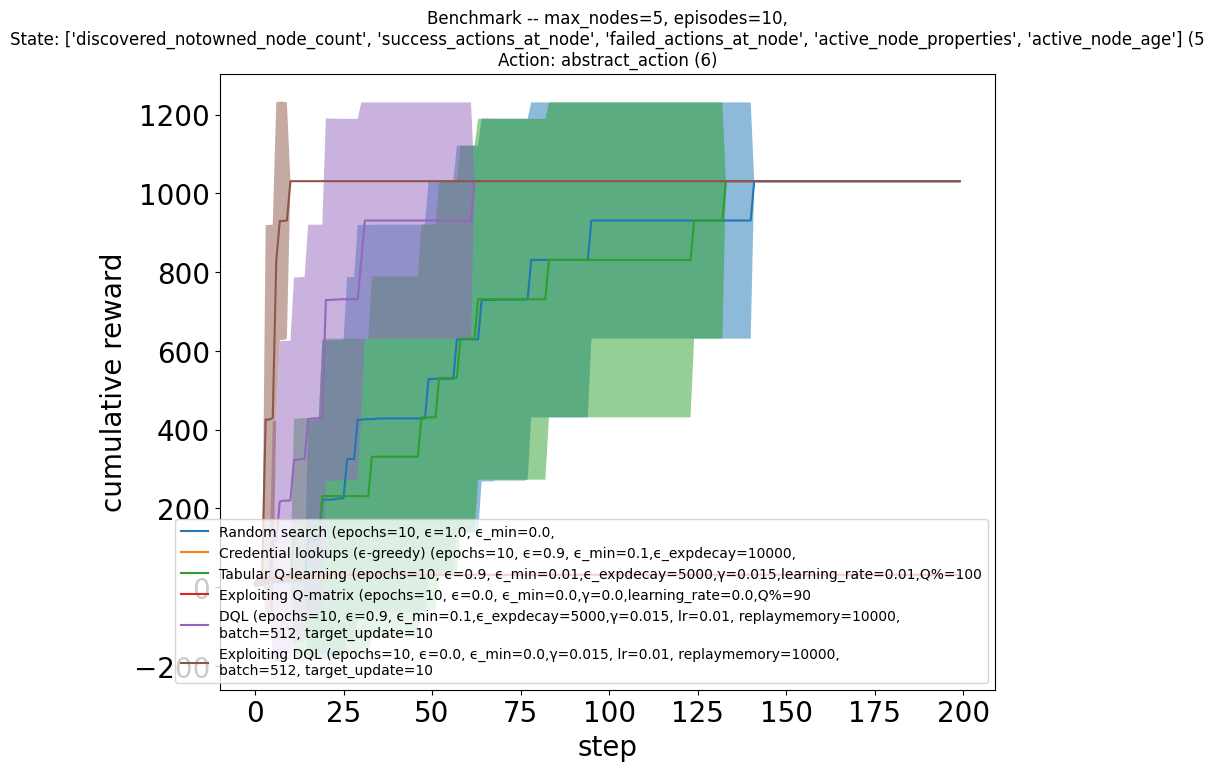

In [13]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

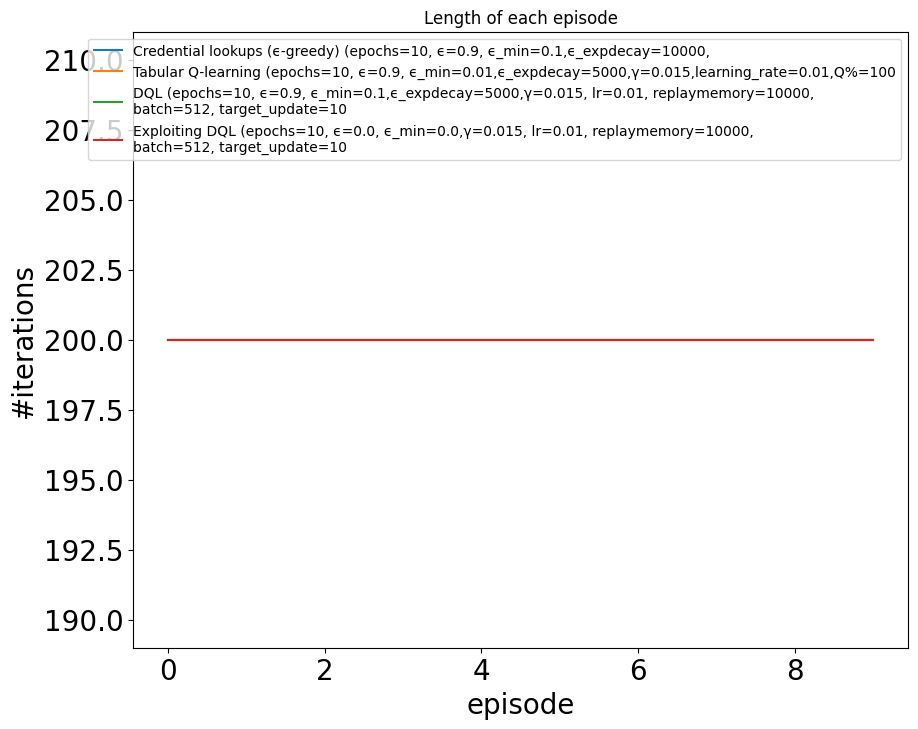

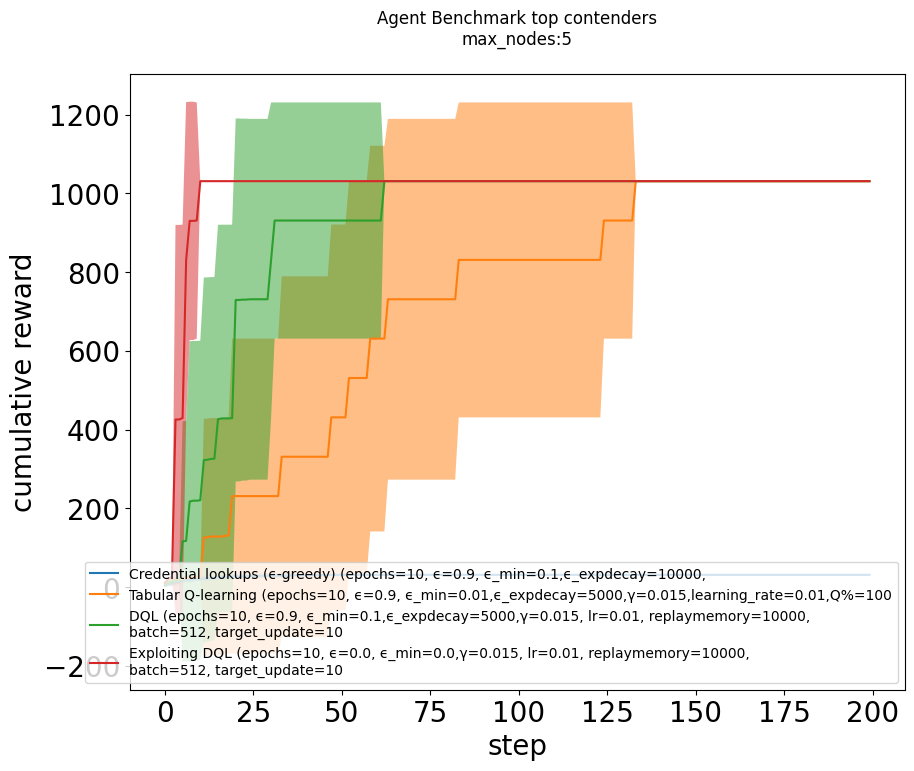

In [14]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

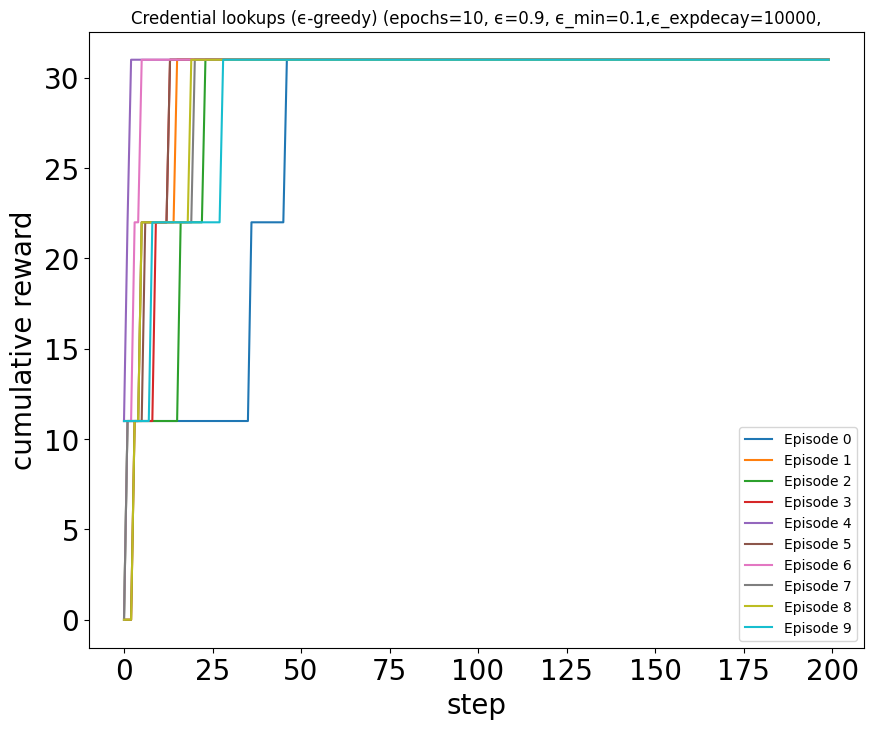

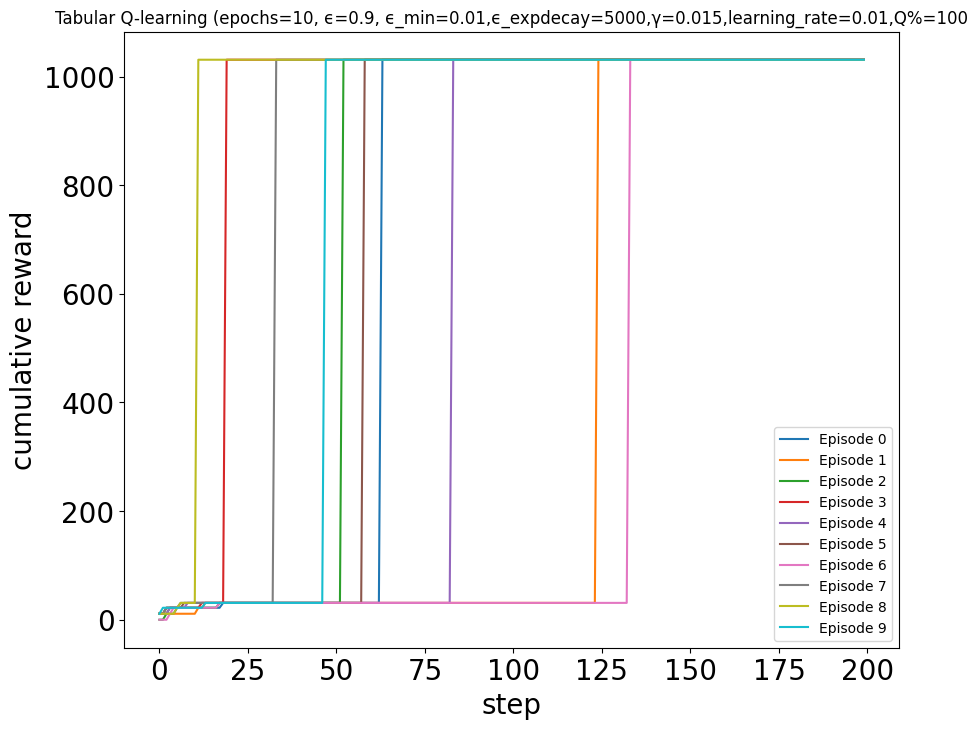

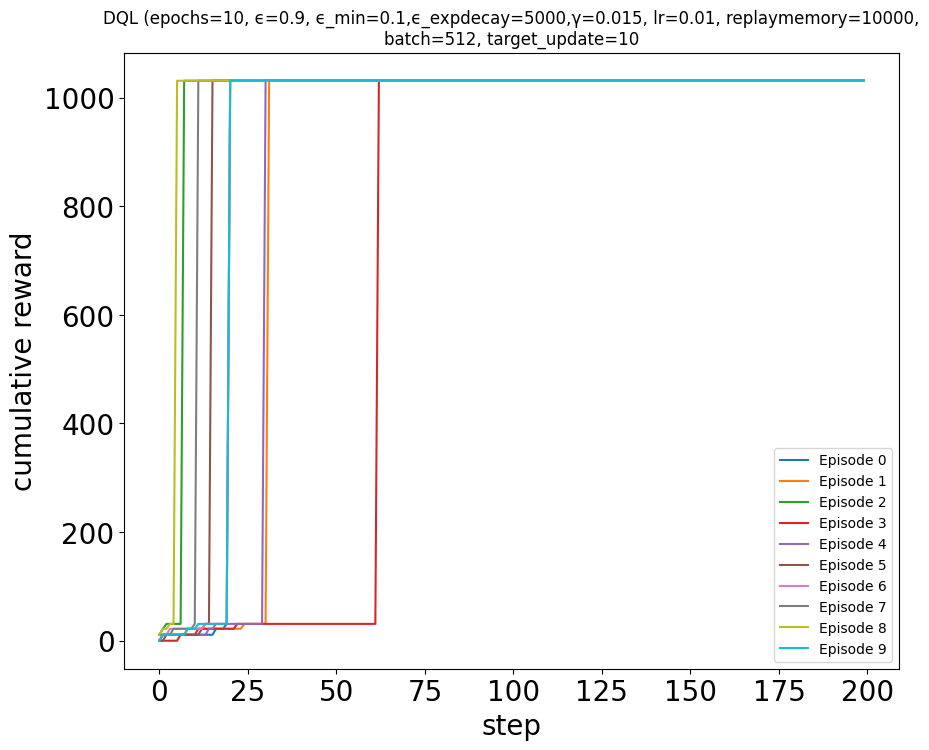

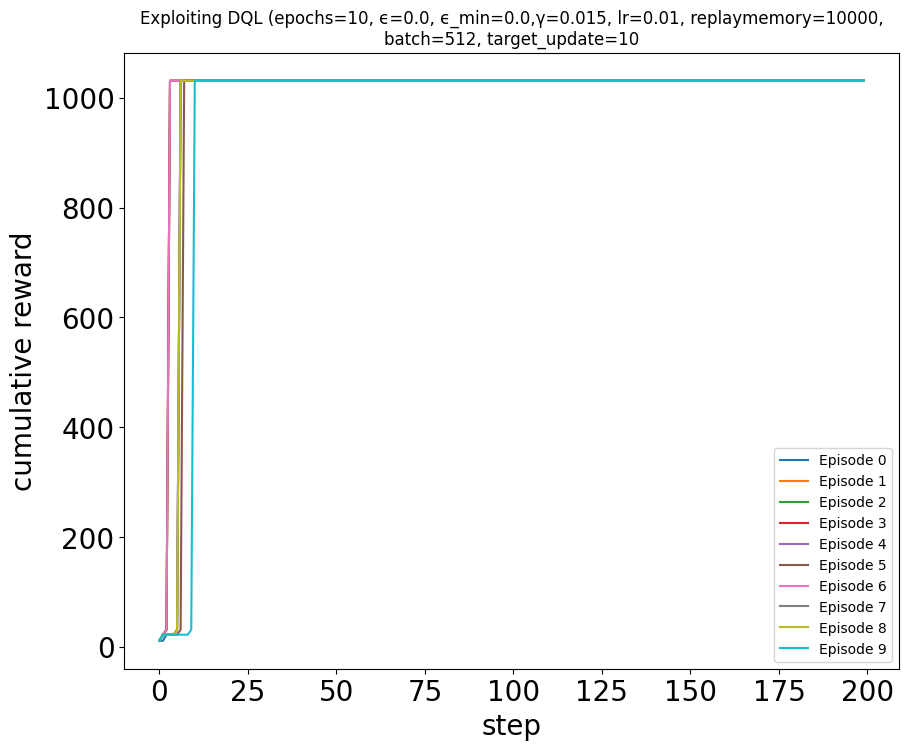

In [15]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)